In [ ]:
import torch
from torch import nn # building blocks for nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cpu


# 1. Data preparing and loading

## Get the data into numerical representation

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:5], y[:5], len(X), len(y), X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50,
 torch.Size([50, 1]))

# Splitting the data

In [ ]:
train_set = int(0.8 * len(X))
x_train, y_train = X[:train_set], y[:train_set]
x_test, y_test = X[train_set:], y[train_set:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions (train_data= x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', s=4, label='Training data' )
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size':14})

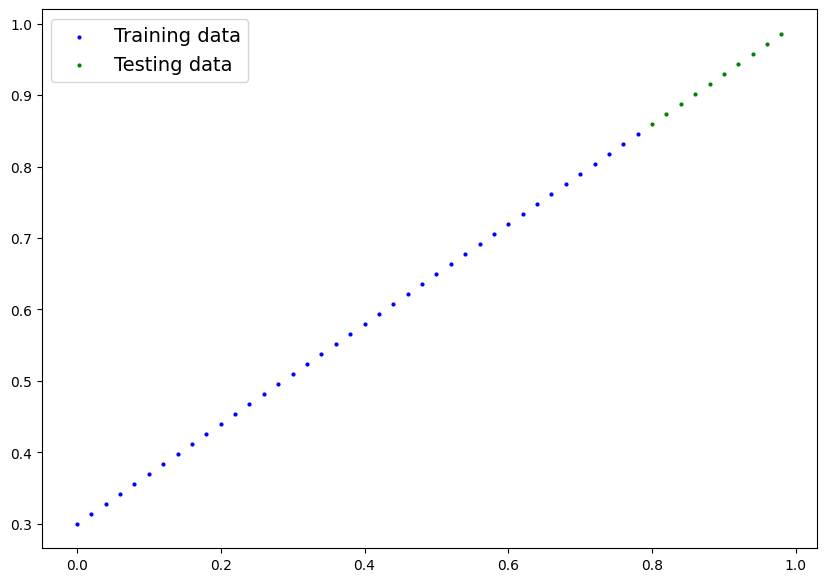

In [ ]:
plot_predictions()

# Build a model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        torch.randn(1,
                   requires_grad=True,
                   dtype=torch.float))

    self.biass = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype=torch.float))

    # or
    # self.linear_layer = nn.Linnear(in_features=1, out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.biass
    # return self.linear_layer(x)



# Check our mode

In [ ]:
torch.manual_seed(42)

In [ ]:
model_0 = LinearRegressionModel()

model_0.parameters()

<generator object Module.parameters at 0x7a8f62af3610>

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('biass', tensor([0.1288]))])

# Make predictions

### torch.inference_mode()

Predict y_test using x_test


In [ ]:
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

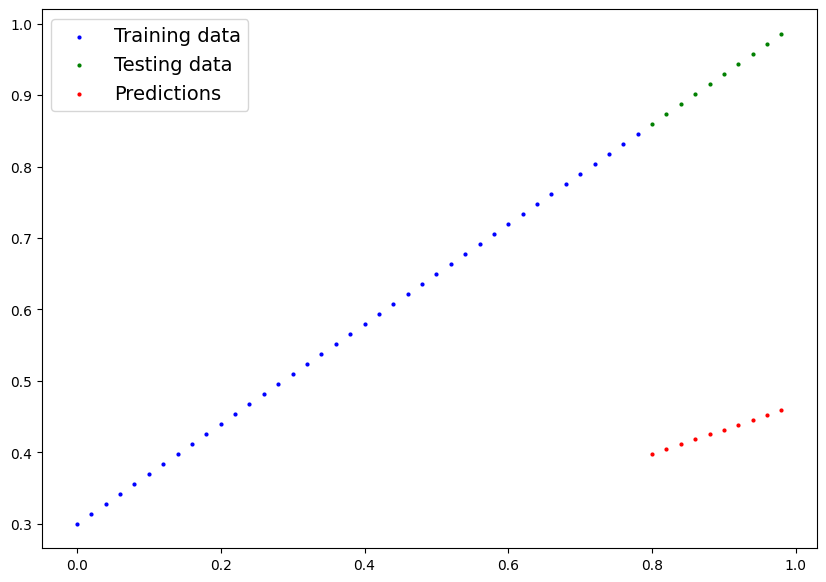

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y2_preds = model_0(x_test)
y2_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

# Train our model

Adjust weights and biass

**Loss Function** measure how model is performing.

**Optimizer** Takes into account the loss af a model and adjust the parameters

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('biass', tensor([0.1288]))])

In [ ]:
# set up loss function L1
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Build a train and test loop

0. Loop through the data
1. Forward pass
2. Calculate Loss
3. Optimizer zero grad
4. Loss Backward (Backpropagation)
5. Optimizer step use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
epochs = 200
loss_history = []
epoch_count = []
test_loss_values = []


# 0. Loop through the data
for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(x_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train) # order matters
  #print('Loss: ', loss)
  loss_history.append(loss.item())
  # 3. Optimizer zero grand
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # Step the optimizer ( perform gradient descent )
  optimizer.step()

  # Testing
  model_0.eval() # turns off different settings not needed in testing
  with torch.inference_mode(): #  turns off gradient tracking
    # 1. forward pass
    test_pred = model_0(x_test)

    # 2. Calculate Loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}')

  epoch_count.append(epoch)
  test_loss_values.append(test_loss.item()) # .item(): tensor to numpy

print(model_0.state_dict())


Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Test: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Test: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Test: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Test: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Test: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Test: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Test: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Test: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Test: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Test: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Test: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [ ]:
# weights and bias va canviant
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('biass', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

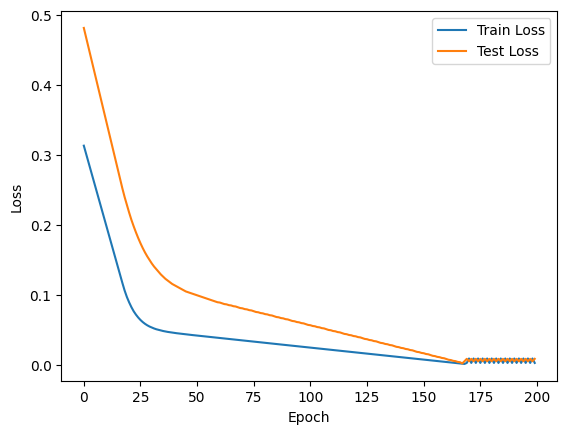

In [ ]:
plt.plot(loss_history, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

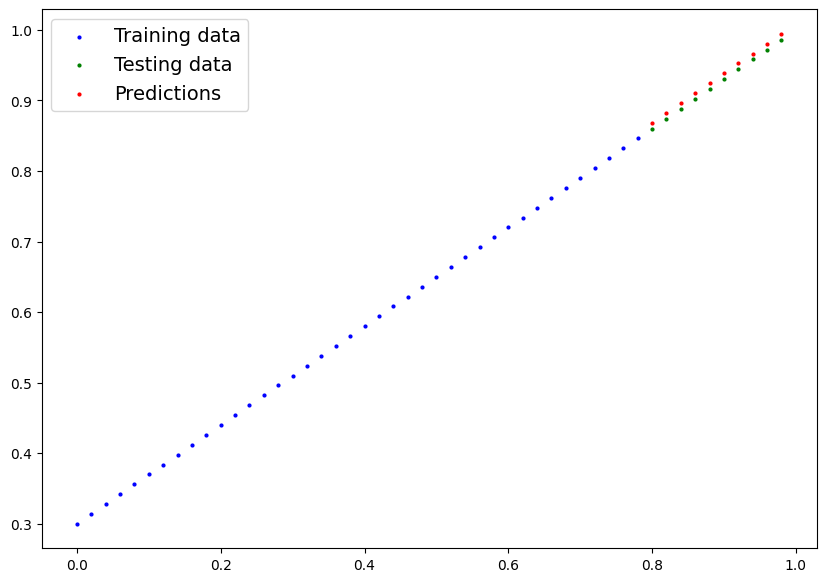

In [ ]:
plot_predictions(predictions=y_preds_new)

# Saving a model

There are three main methods you should about for saving and loading models. Save ** entire model**

1. `torch.save` - allows you to save a Pytorch object in pythons pickle format.

2. `torch.load()` - allows you load a saved pytorch object.

3. `torch..nn.Module.load_state_dict()`- this allows to load a model's saved state dictionary.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('biass', tensor([0.3093]))])

In [ ]:
# Saving our pytorch model
from pathlib import Path

# 1 . Create Models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_yt_model_0.pth."
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model
print(f'Save model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Save model to models/01_pytorch_workflow_yt_model_0.pth.


# Load the model

torch.load()

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.state_dict() # random params

OrderedDict([('weights', tensor([-1.1229])), ('biass', tensor([-0.1863]))])

In [ ]:
# get the params after training
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict() # loaded params

OrderedDict([('weights', tensor([0.6990])), ('biass', tensor([0.3093]))])

In [ ]:
# Make some predictions
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])